<a href="https://colab.research.google.com/github/RusticHaze634/DataAna_track/blob/main/Shopper_Intention_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Online Shoppers’ Purchasing Intention

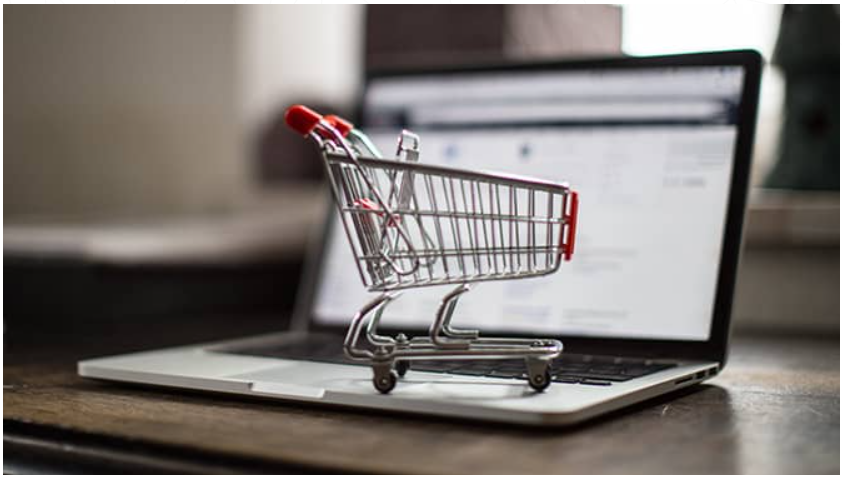




Market opportunity has been generated due to the rise in e-commerce activity over the past several years, yet low conversion rates mean that innovative approaches are needed to reach today's digital consumers with relevant offers. An experienced salesperson at a physical or offline store can use their knowledge to provide consumers with individualised recommendations. Time efficiency, sales, and profits all benefit from this knowledge to varying degrees. Companies in the fields of e-commerce and information technology spend a lot of money on early detection and behavioural prediction algorithms that attempt to mimic the actions of a human salesman in an online store. In tandem with these initiatives, a number of academic research employing machine learning techniques have been proposed to investigate the issue from various vantage points. There are a variety of research that try to increase shopping cart abandonment and purchase conversion rates; some of these studies focus on classifying visits based on the user's navigational patterns.  


## 1. Used Dataset:
### Online Shopper Intention Dataset
- The dataset consists of feature vectors belonging to 12,330 sessions.
- The data set is a set of 18 features: 10 numerical and 8 categorical.
- Dataset is split into 10,422 entries where the shoppers did not purchase and 1908 entries where the shoppers did purchase. 
- The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.


## 2. The Workflow
- 
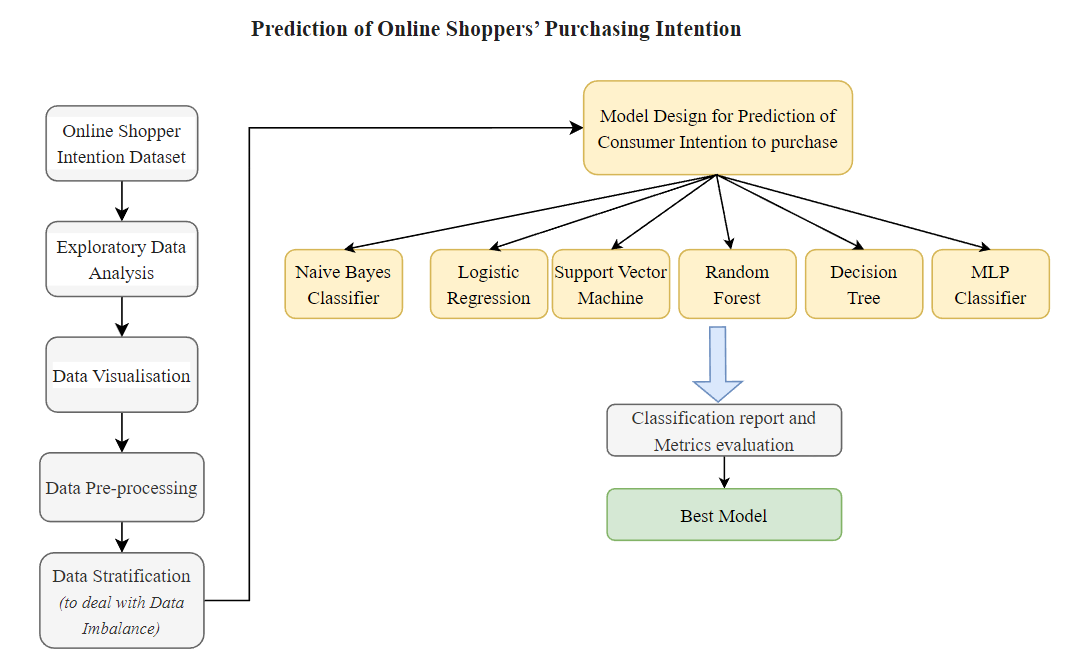

## 3. Platform and Tools Utilised in the Project
- Python coding and execution platform for the research work: **Google Colaboratory**
- Graph Plotting and Image Generation: **Matplotlib, Plotly**
- Data Preprocessing, Model Design: **TensorFlow Keras, Python**
- Project Visualistion: MS Powerpoint, MS PowerBi

## 4. Required Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import sklearn

import warnings
warnings.filterwarnings('ignore')

## 5. Loading the Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls /content/drive/MyDrive/'Colab Notebooks'/

In [ ]:
data_path = ('/content/drive/MyDrive/Colab Notebooks/Shopper_Intention/online_shoppers_intention.csv')


In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 6. EDA

In [ ]:
#!pip install dtale

In [ ]:
!pip install dataprep

In [ ]:
import dataprep

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



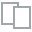
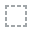
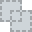
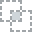
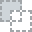
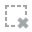
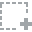
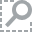
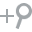
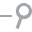
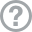
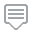
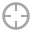
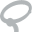
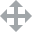
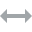
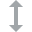
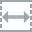
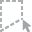
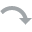
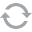
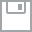
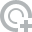
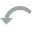
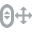
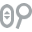
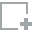
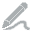
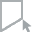
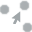
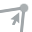
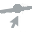

In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import plot
from dataprep.eda import create_report

report = create_report(df, title='Shopper Intention Dataset Report')
# create_report(df).show()
report.show()

# report show in browser 
#report.show_browser()

In [ ]:
report.show_browser()

In [ ]:
#  Check for number of distinct values for each feature in the data

uniques = df.nunique(axis=0)
print(uniques)

Administrative                27
Administrative_Duration     3335
Informational                 17
Informational_Duration      1258
ProductRelated               311
ProductRelated_Duration     9551
BounceRates in %            1872
ExitRates in %              4777
PageValues                  2704
SpecialDay (probability)       6
Month                         10
OperatingSystems               8
Browser                       13
Region                         9
TrafficType                   20
VisitorType                    3
Weekend                        2
Revenue                        2
dtype: int64


In [ ]:
# Check for missing values in data
nullcount = df.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

## Details of Data Columns :
### Numerical Features
|Features|Feature Details|Min Value|Max Value|
|:--|:--|-:-|-:-|
|Administrative |- Number of pages visited by the visitor about account management|0|27|
|Administrative duration|- Total amount of time (in seconds) spent by the visitor on account management related pages|0|3398|
|Informational|- Number of pages visited by the visitor about Web site, communication and address information of the shopping site|0|24|
|Informational duration|- Total amount of time (in seconds) spent by the visitor on informational pages|0|2549|
|Product related|- Number of pages visited by visitor about product related pages|0|705|
|Product related duration|- Total amount of time (in seconds) spent by the visitor on product related pages|0|63973|
|Bounce rate|- The percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.|0|0.2|
|Exit rate|- Average exit rate value of the pages visited by the visitor|0|0.2|
|Page value|- Average page value of the pages visited by the visitor|0|361|
|Special day|- Closeness of the site visiting time to a special day (like - Mother's Day)|0|1.0|

   

### Categorical Features
|Features|Feature Details|No. of Categories|
|:--|:--|-:-|
|OperatingSystems|- The OS Used by the consumers|8|
|Browser|- Browser of the visitor|13|
|Region|-  Geographic region from which the session has been started by the visitor|9|
|TrafficType|- Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)|20|
|VisitorType|-Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’|3|
|Weekend|- Boolean value indicating whether the date of the visit is weekend|2|
|Month|- Month of the Visit Date|12|
|Revenue|- Class label indicating whether the visit has been finalized with a transaction|2|

# 7. Data Visualisation

### 7.1. Successful or Unsuccessful Transaction

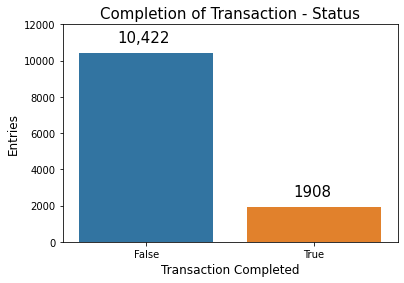

In [ ]:
# Plot for Completion of Transactions

sns.countplot(df['Revenue'])
plt.ylim(0,12000)
plt.title('Completion of Transaction - Status', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Entries', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

**Comment -**There is a clear difference between the number of entries where the consumer ultimately decided not to purchase and the number of entries where they did purchase.   
**Reason -**That makes logical, considering that the vast majority of internet browsing sessions do not result in a final purchase.

### 7.2. Purchasing Tendency of Shoppers in Weekends

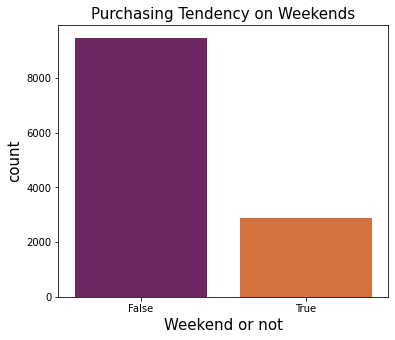

In [ ]:
# check for the distribution of consumers on Weekends

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchasing Tendency on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

**Comment -** The distribution of `Revenue` and `Weekend` data are hightly imbalanced.

### 7.3. Distinct OS used by the Consumers

Different operating systems: 2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
-----------------------------------------------------------------------------


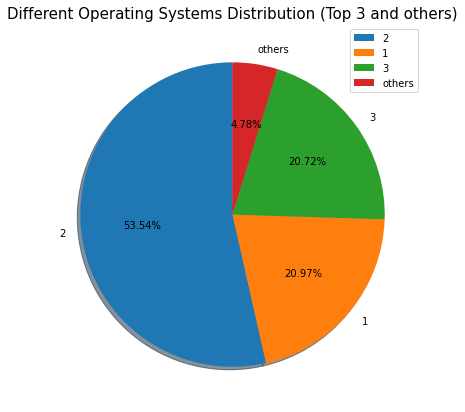

In [ ]:
# plotting a pie chart for Operating Systems

print(f"Different operating systems: {df['OperatingSystems'].value_counts()}")
print("-----------------------------------------------------------------------------")
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
# colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems Distribution (Top 3 and others)', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

- **Comment:** -The three most popular Operating systems account for 95% of the data here. 

### 7.4. Browsers Used by the Consumers

Different operating systems: 2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
-----------------------------------------------------------------------------


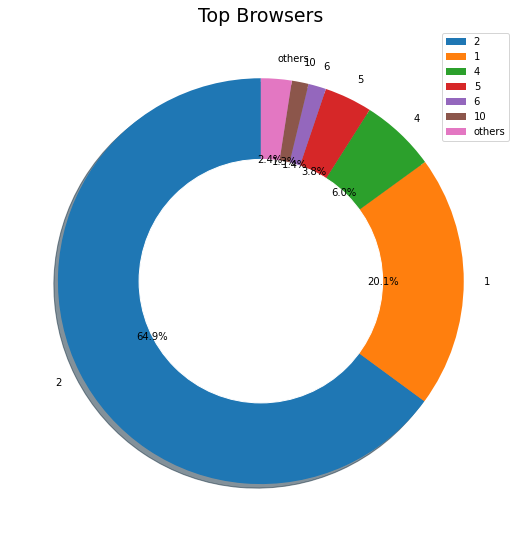

In [ ]:
# no. of Browsers
print(f"Different browsers: {df['Browser'].value_counts()}")
print("-----------------------------------------------------------------------------")

# Ploting a pie chart for operating systems
plt.rcParams['figure.figsize'] = (20, 10)
circle = plt.Circle((0, 0), 0.6, color = 'white')
size = [7961, 2462, 736, 467,174, 163, 300]

labels = "2", "1", "4", "5", "6", "10", "others"
explode = [0, 0, 0, 0, 0, 0, 0]

plt.subplot(1, 2, 2)
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Top Browsers', fontsize = 19)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

- **Comment:** - Almost 90% consumers use 3 distinct kind of browsers

### 7.5. Consumers and Month

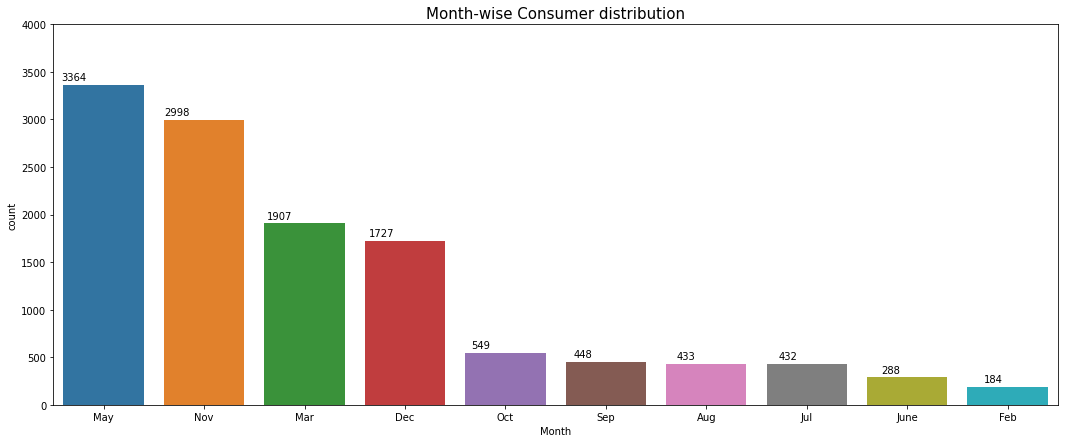

In [ ]:
# Plotting bar chart(countplot) for Month-wise Consumer distribution
monthly = df['Month'].value_counts()

sns.countplot(df['Month'], order=monthly.index)
plt.title('Month-wise Consumer distribution', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

### 7.6. Type of Visitors - Distribution

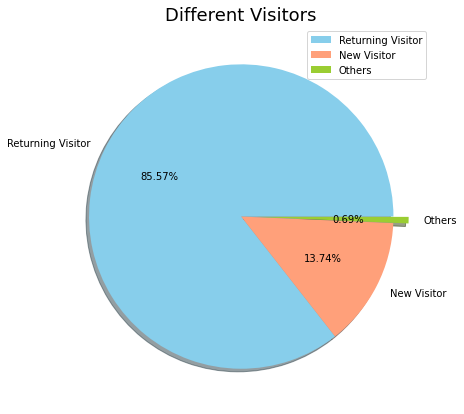

In [ ]:
# plot a pie chart for VisitorsType

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['skyblue', 'lightsalmon', 'yellowgreen']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 18)
plt.axis('off')
plt.legend()
plt.show()

- **Comment:** A huge number of visitors (85.57%) are Returning Visitors.

### 7.6. Region-wise Consumer Distribution

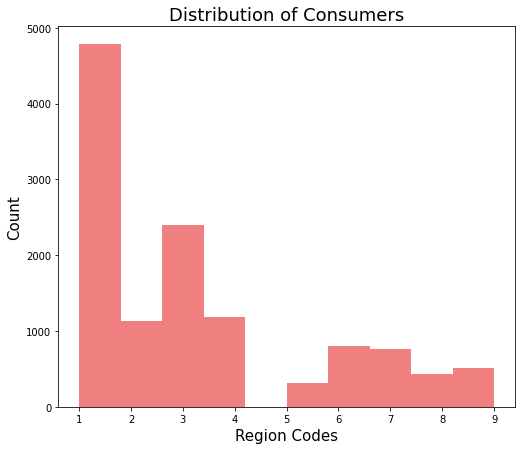

In [ ]:
# visualizing the distribution of the consumers around the Region
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['Region'], color = 'lightcoral')
plt.title('Distribution of Consumers', fontsize = 18)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [ ]:
df1 = df.copy()
df1.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0,1,0,0,0,0,0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0,0,0,2,64,0,0,0,0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0,0,0,1,0,0,0,0,0,Feb,4,1,9,3,Returning_Visitor,False,False


In [ ]:
# converting boolean values to 0 and 1
df1[["Weekend","Revenue"]] = df1[["Weekend","Revenue"]].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [ ]:
# Converting Categorical values to labels

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Month_encoded"] = le.fit_transform(df1["Month"])

month_encodings = le.classes_
df1["VisitorType_encoded"] = le.fit_transform(df1["VisitorType"])
visitor_type_encodings = le.classes_

month_encodings,visitor_type_encodings

(array(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
        'Sep'], dtype=object),
 array(['New_Visitor', 'Other', 'Returning_Visitor'], dtype=object))

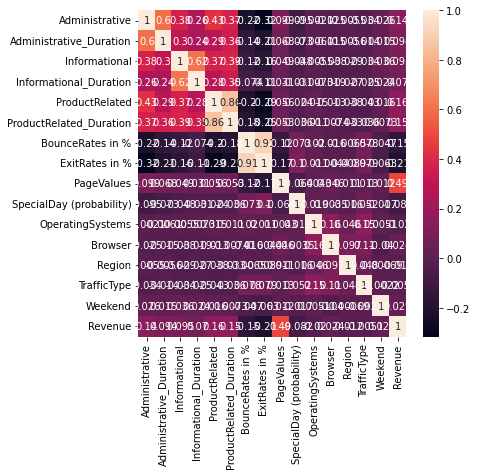

In [ ]:
# Correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

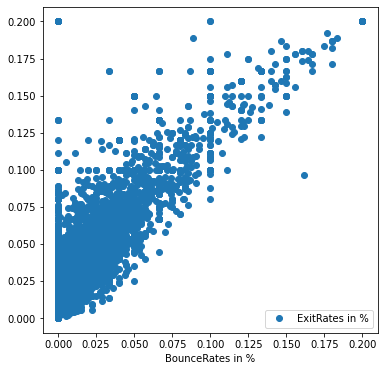

In [ ]:
# Plotting Bouncrates and Exit rates
df.plot(x='BounceRates in %', y='ExitRates in %', style='o')

# Analysis Report

### a) Impact of bounce rate and exit rate
  
Bounce rate is the overall percentage of a single engagement session whereas exit rate is the percentage of exits from a page. Hence the former is calculated by dividing the aggregation of one-page visits to the overall entrance visits whereas latter is calculated by dividing the aggregation of total exits from a page to the total visits to a page. One major difference between these closely tied metrics is that exit rate is related to the overall percentage of visitors that were within the last session whereas bounce rates account for the percentage of visitors that were part of that one and only session. Hence in the case of bounce rate, prior activity is not considered. Hence all bounces logically define exits but conversely it is not true .  

A high bounce rate could indicate issues with user satisfaction 1 owing to one or many reasons such as unfriendly UI of the website, extremely slow throughput or other technical matters. A high exit rate could be a sign of lower performing sectors in funnels, showing areas open to optimization as if customers are leaving then at the end of the day no one is buying. A bounce rate between 30% to 55% is acceptable. Our analysis shows the bounce rates 7 largely scattered lower than 10%.   
 A bounce rate lower than 5% is a cause 8 of concern indicating a possibility of the Google Analytics code was inserted twice. Hence more investigation is needed on these data. Given that there is indeed no error we could look for ways to optimize bounce rates and exit rates to ensure saving sales and securing customer loyalty.   

Most of the numerical attributes seem to exhibit high positive skewness whereas some exhibit nominal tinge of negative skewness.   

### b) Impact of loyal customers and "The weekend syndrome"

Most of the customers whether they drive in revenue or not, are returning customers, suggesting that the firm has dealt with good retention with customers. However, the need to work on conversion rates is apparent. This is a common tendency in many firms to focus on conversion or retention and not balance out on both. While retention speaks of brand value, without new customers driving in this could significantly impact sales and revenue growth. Most of the visitors came in and made a purchase during the weekday. We could exploit this further by trying to bring in more customers viewing and purchasing on the weekends.  


### c) Impact of lower conversion during holidays

The seasonality revenue growth. There seems to be a high customer engagement during the months of Feb, Mar and May, post which the trend seems to be decreasing. Moreover, between the months of June to Oct the trend seems to stagnate post which there seems to be high engagement as Black Friday approaches. When the demand appears high, there appears to be a lot of engagement but significantly lower conversion rates as most of these purchases are driven by returning customers. While this suggests the presence of a good loyalty program, more attention is needed in conversion as the plots above suggests that a lot of customers are viewing your products but not taking a step further to make a purchase.


### d)  Impact of other revenue drivers

The relationship between revenue growth and the operating system, browser region and traffic type sources. With respect to OS, the top performer remained “2” in both cases i.e, visitors and visitors who made a purchase. However, following positions were conversely secured by “1” and “3”. Other sources brought in considerably lower customers. This could either mean that the website is not user friendly on those sources or simply because those sources are niche, not many customers use them. With respect to browsers, “2” remains at the top followed by “1” , “4” and “5” in both cases. This could suggest the same reasonings as OS. With respect to region, “1” seems to be performing significantly better followed by “3” in both cases. The lead of “1” is highly significant suggesting that marketing reach within this region is well versed with. There is room for improvement within other regions. With respect to traffic type, “2” remains in the lead followed by “1” and “3”, suggesting the impact of Google SEO optimization. However, only 45% of these were revenue driven, |suggesting room for improvement with SEO and/or Google / Social media Ads.  



# Prediction 
## Data Pre-processing

- Month: 12 classes, drop it  - Plot: Entries per Month
- Month_num: 1-12
- VisitorType: 'Returning visitor', 'new visitor', 'Other'
- VisitorType_Num: 1,2,3
- OperatingSystems: 6,3,7,1,5,2,4,8
- Browser: 9,3,6,7,1,2,8,11,4,5,10,13,12
- Region: 8,6,3,4,7,1,5,2,9
- TrafficType: 12,15,17,18,13,19,3,9,1,6,4,14,11,10,5,2,20,8,7,16
- Weekend: 1, 0

Data Split: 0.8  

   




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier


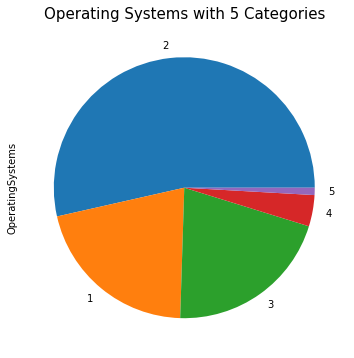

In [ ]:
# Categorising the OS features in 5 classes

df['OperatingSystems'] = df['OperatingSystems'].replace([5,6,7,8],5)
os_plot = df['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems with 5 Categories', fontsize=15)
plt.show()

- **Comment :** -  
    - Category 5 = low-usage operating systems
    - Category 1,2, 3 = Most used operating systems
    - Category 2 - Highest used operating systems
    - Operating systems can be  Windows, Mac, Linux

  ### Important Features:

   PageValues, ExitRates, ProductRelated_Duration, BounceRates, ProductRelated.


In [ ]:
# Removing unneccessary columns from data: shopping_clean

df_clean = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [ ]:
df_clean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Returning_Visitor,False


In [ ]:
list(df.columns)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates in %',
 'ExitRates in %',
 'PageValues',
 'SpecialDay (probability)',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [ ]:
# df_clean1 = df.drop(['Administrative',
#  'Administrative_Duration',
#  'Informational',
#  'Informational_Duration',
#  'SpecialDay (probability)',
#  'Month',
#  'OperatingSystems',
#  'Browser',
#  'Region',
#  'TrafficType',
#  'VisitorType',
#  'Weekend'], axis=1)

In [ ]:
# df_clean1.head()

In [ ]:
#Label and One Hot Encoding

# Encoding Vistor Type

visitor_encoded = pd.get_dummies(df_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

df_clean_merged = pd.concat([df_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)



In [ ]:
# df_clean_merged = df_clean1.copy()

In [ ]:
df_clean_merged.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Revenue,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False,0,1


In [ ]:
# Split train and test data

X = df_clean_merged.drop('Revenue', axis=1)
y = df_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

### Dealing with Data Imbalance

- **Reason:** - Because the training data is an imbalanced dataset . It is skewed in the direction of the 'Not purchased' category. 
- **Step to take:**- We have to stratify our training data so that the ratio of training labels is equal. And this way we can avoid bias in prediction.

#### Stratifying/ Imabalnce Handling
- stratified shuffle split package in Scikit

In [ ]:
# data Stratifying for imbalance handling
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

# Model Design for Shopper Intention Classification

- Naive Bayes Classifier
- Logistic Regression
- Support Vector Machine
- Random Forest   
- MLP Classifier
- Decision Tree

In [ ]:
pd.set_option('display.float_format', lambda x: '%0.0f' % x)

## Model 1: Naive Bayes

In [ ]:
# model1- naive Bayes define and training
model1 = GaussianNB()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

# evaluating the model 1
print(f"Training Accuracy:  {model1.score(X_train, y_train)*100} %")
print(f"Testing Accuracy:   {model1.score(X_test, y_test)*100}%")

Training Accuracy:  87.01338199513383 %
Testing Accuracy:   85.80697485806975%


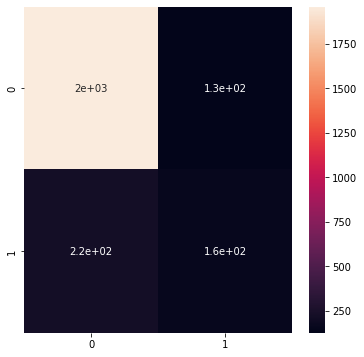

In [ ]:
# confusion matrix for Naive bayes
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report
Report1 = metrics.classification_report(y_test, y_pred)
print(Report1)

              precision    recall  f1-score   support

       False       0.90      0.94      0.92      2084
        True       0.56      0.42      0.48       382

    accuracy                           0.86      2466
   macro avg       0.73      0.68      0.70      2466
weighted avg       0.84      0.86      0.85      2466



## Model 2: Logistic Regression

In [ ]:


# model2- Logistic Regression  define and training
from sklearn import linear_model
model2 = linear_model.LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

# evaluating the model 1
print(f"Training Accuracy:  {model2.score(X_train, y_train)*100} %")
print(f"Testing Accuracy:   {model2.score(X_test, y_test)*100}%")

Training Accuracy:  88.21978913219789 %
Testing Accuracy:   87.51013787510138%


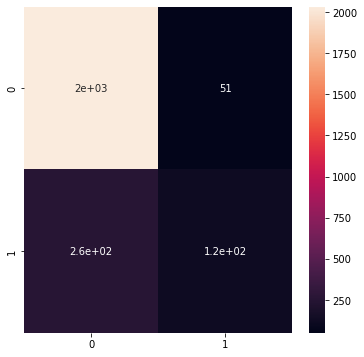

In [ ]:
# confusion matrix for Logistic Regression
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report Logistic regression
Report2 = metrics.classification_report(y_test, y_pred)
print(Report2)

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2084
        True       0.73      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



## Model 3 : Support Vector Machine


In [ ]:
# model3- Support Vector Machine define and training
from sklearn import svm
model3 = svm.SVC()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

# evaluating the model 1
print(f"Training Accuracy:  {model3.score(X_train, y_train)*100} %")
print(f"Testing Accuracy:   {model3.score(X_test, y_test)*100}%")

Training Accuracy:  84.82360097323601 %
Testing Accuracy:   84.8742903487429%


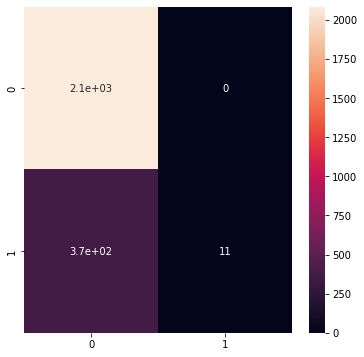

In [ ]:
# confusion matrix for Support Vector Machine
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report SVM
Report3 = metrics.classification_report(y_test, y_pred)
print(Report3)

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2084
        True       1.00      0.03      0.06       382

    accuracy                           0.85      2466
   macro avg       0.92      0.51      0.49      2466
weighted avg       0.87      0.85      0.78      2466



## Model 4 : Random Forest

In [ ]:
# Model4- Random Forest Classifier define and training
model4 = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

# evaluating the model 1
print(f"Training Accuracy:  {model4.score(X_train, y_train)*100} %")
print(f"Testing Accuracy:   {model4.score(X_test, y_test)*100}%")

Training Accuracy:  90.58191403081915 %
Testing Accuracy:   89.49716139497161%


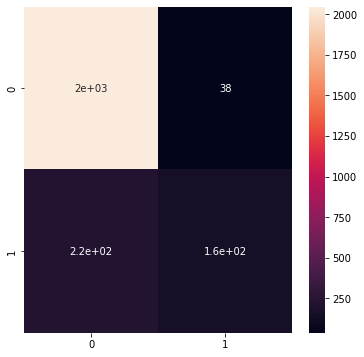

In [ ]:
# confusion matrix for Random Forest
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report Random Forest
Report4 = metrics.classification_report(y_test, y_pred)
print(Report4)

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2084
        True       0.81      0.42      0.55       382

    accuracy                           0.89      2466
   macro avg       0.86      0.70      0.75      2466
weighted avg       0.89      0.89      0.88      2466



## Model 5: Multi-Layer Perceptron (MLP)

In [ ]:
# Model5- MLP Classifier define and training
from sklearn.neural_network import MLPClassifier
model5 = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.001)
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

# evaluating the model 1
print(f"Training Accuracy:  {model5.score(X_train, y_train)*100} %")
print(f"Testing Accuracy:   {model5.score(X_test, y_test)*100}%")

Iteration 1, loss = 4.86107920
Iteration 2, loss = 3.45544692
Iteration 3, loss = 2.50578706
Iteration 4, loss = 1.71662381
Iteration 5, loss = 1.12554243
Iteration 6, loss = 0.75658096
Iteration 7, loss = 0.66854475
Iteration 8, loss = 0.59226223
Iteration 9, loss = 0.56373954
Iteration 10, loss = 0.54028224
Iteration 11, loss = 0.54633260
Iteration 12, loss = 0.52608150
Iteration 13, loss = 0.50121338
Iteration 14, loss = 0.47747028
Iteration 15, loss = 0.47303636
Iteration 16, loss = 0.45352703
Iteration 17, loss = 0.45654222
Iteration 18, loss = 0.44095567
Iteration 19, loss = 0.47798576
Iteration 20, loss = 0.42559313
Iteration 21, loss = 0.44270196
Iteration 22, loss = 0.40981974
Iteration 23, loss = 0.40560619
Iteration 24, loss = 0.40287088
Iteration 25, loss = 0.39599123
Iteration 26, loss = 0.37542301
Iteration 27, loss = 0.42118890
Iteration 28, loss = 0.38599897
Iteration 29, loss = 0.39052819
Iteration 30, loss = 0.37942533
Iteration 31, loss = 0.36335170
Iteration 32, los

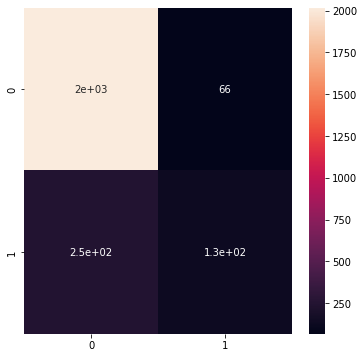

In [ ]:
# confusion matrix for Random Forest
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report Random Forest
Report5 = metrics.classification_report(y_test, y_pred)
print(Report5)

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2084
        True       0.67      0.35      0.46       382

    accuracy                           0.87      2466
   macro avg       0.78      0.66      0.69      2466
weighted avg       0.86      0.87      0.86      2466



## Model 6: Decision Tree

In [ ]:
# Model6- DT Classifier define and training

from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)

y_pred = model6.predict(X_test)

# evaluating the model 1
print(f"Training Accuracy:  {model6.score(X_train, y_train)*100} %")
print(f"Testing Accuracy:   {model6.score(X_test, y_test)*100}%")


Training Accuracy:  99.97972424979724 %
Testing Accuracy:   84.67153284671532%


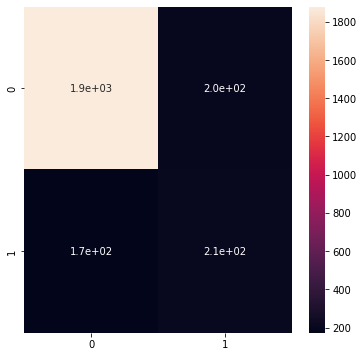

In [ ]:
# confusion matrix for Random Forest
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report Random Forest
Report6 = metrics.classification_report(y_test, y_pred)
print(Report6)

              precision    recall  f1-score   support

       False       0.92      0.90      0.91      2084
        True       0.50      0.55      0.53       382

    accuracy                           0.85      2466
   macro avg       0.71      0.72      0.72      2466
weighted avg       0.85      0.85      0.85      2466



## Model 7: Random Forest with SMOTE

In [ ]:


# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))


Before oversampling:  Counter({False: 8338, True: 1526})
After oversampling:  Counter({False: 8338, True: 8338})


In [ ]:
# Model4- Random Forest Classifier define and training
model7 = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
model7.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = model7.predict(X_test)

# evaluating the model 1
print(f"Training Accuracy:  {model7.score(X_train, y_train)*100} %")
print(f"Testing Accuracy:   {model7.score(X_test, y_test)*100}%")

Training Accuracy:  87.56082725060827 %
Testing Accuracy:   87.10462287104623%


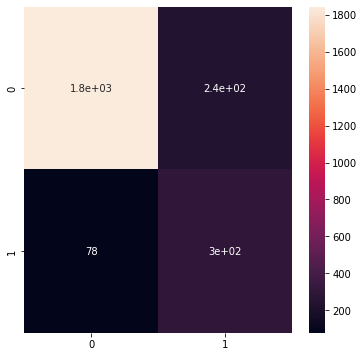

In [ ]:
# confusion matrix for Random Forest
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report Random Forest
Report4 = metrics.classification_report(y_test, y_pred)
print(Report4)

              precision    recall  f1-score   support

       False       0.96      0.88      0.92      2084
        True       0.56      0.80      0.66       382

    accuracy                           0.87      2466
   macro avg       0.76      0.84      0.79      2466
weighted avg       0.90      0.87      0.88      2466



## Best Model

- To find the best model we have to consider the Underfitting-Overfitting    concept.    
If both the training accuracy and test accuracy are close then the model has not overfit. If the training result is very good and the test result is poor then the model has overfitted. If the training accuracy and test accuracy is low then the model has underfit. 

- Now, From above predictive models we see that the training accuracy (99.97%) for **Decision Tree** model is really high, but the testing accuracy is far low (84.67%)  
    -- > So this is an overfitted model.
- The **MLP** model shows promising result wher the training accuracy (88.24%) and testing accuracy (87.26%) is not far away from each other.   
    --> So this can be considered a good model.

- Similarly , **Logistic regression** model shows almost same result as the MLP one, with Training Accuracy of 88.21 %
and a  Testing Accuracy of 87.51%
    --> This is also a good one.

- But, the training accuracy is very high in Decision tree model.
- LSTM-RNN-based model showed low accuracy than that of the other models

### Future work aspect
So in future we can think in the line of Stacking based Ensemble model also with the considdereation of feature importance so thta the accuracy can be better than the obtained results

# Recommendation from Analysis Report

- **Recommendation 1:** Optimization of the landing product pages by means such as making the add to cart option stand out, UI friendly, short descriptions and icons wherever needed, color impactfulness and ensuring that the purchase experience is as smooth as possible. Another important aspect is to ensure not to create an illusion of low price until put in the cart, i.e. the shipping fees could create a significant impact over exit rates. Hence it is always better to exhibit the true cost right from the start.

- **Recommendation 2:** Categorizing email retargeting based on funneling as mentioned with the previous dataset, so that there exists a personalized touch to the mail. Personalization brings in large scale loyalty and in turn better retention.

- **Recommendation 3:** Introducing pop-ups offering qualitative discounts or personalized queries when a customer bounces multiple times and/or tries to leave the website.

- **Recommendation 4:** Engage loyal customers in conversion of other customers by offering discounts for friends joining in. For new customers making a purchase in this manner, offer discounts as well.

- **Recommendation 5:** Introduce time based or weekend based marketing campaign and/or promotional events to engage customers more on the weekends

- **Recommendation 6:** Introduction of seasonal promotions with attractive offers and events, engaging more conversions and ensuring loyal customers have a beneficial part in bringing in new conversions.

- **Recommendation 7:** Ensuring smooth technical operations with enhanced and personalized UI experience supported by all browsers and OS.

- **Recommendation 8:** Adapting similar model based approach as Region 1 over other regions by customizing the same according to social and cultural drivers. Personalizing ads and reach by A/B testing to ensure the reach and conversion / retention shows significant growth among all regions.

- **Recommendation 9:** Ensuring optimization of SEO from different sources such as Google, Bing, Baidu etc. Working with region and age specific A/B testing within Google Ads, Facebook Ads or other sources.

- **Recommendation 10:** The significant impact on PageValue suggests that customers look at considerably different products and its recommendations. Hence a significant improvement on recommendation engines and bundle packages would bring in more conversions. Including more products exploiting the long tail effect in e-commerce will also bring in more revenue drivers

## Conclusion


**Conclusive points for recommendation**
- 1. Recommendation engines and inclusion of “long tail” driven products
- 2. SEO optimization and Ads via Social Media
- 3. Optimization of landing pages
- 4. Smooth technical operations and user-friendly UI
- 5. Seasonal promotions and discounts
- 6. Weekend/Time based promotions and discounts
- 7. Discounts for newcomers and connections of loyal customers
- 8. Region based A/B testing and market reach
- 9. Personalized email retargeting
- 10. Exit rate strategy with personalized pop-ups

**Comments:**
 - Purchase-motivated consumers: Spend more time on the site, especially if they're looking for a specific product—->  Lower tendency to bail out

 - Without putting this model into production in the cloud to evaluate prospective customers' data in real time and tailor marketing campaigns to the individuals most likely to make a purchase, all of the aforementioned would be of limited use to the organisation.